In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [28]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
X = df.drop(['Class'], axis=1)
Y = df['Class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
X_test, X_val, Y_test, Y_val = train_test_split(X_test,y_test, test_size=.5)

In [31]:
from sklearn.metrics import confusion_matrix
import itertools
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.callbacks import ReduceLROnPlateau

In [32]:
X_train.shape

(199364, 30)

In [33]:
model = Sequential()

model.add(keras.layers.Dense(128, activation='relu', input_shape=(30,)))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

print('model defined :)')

model defined :)


In [34]:
import tensorflow as tf
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint('FraudDetectionModel.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=25,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

opt = keras.optimizers.Adam(lr=0.001)

In [35]:
model.compile(loss='binary_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

In [36]:
hist = model.fit(X_train, y_train,
        epochs=25,
        validation_data=(X_val, Y_val),
        callbacks = callbacks)

Epoch 1/25
6231/6231 [==============================] - 14s 2ms/step - loss: 0.0732 - accuracy: 0.9767 - val_loss: 0.0129 - val_accuracy: 0.9983

Epoch 00001: val_loss improved from inf to 0.01294, saving model to FraudDetectionModel.h5
Epoch 2/25
6231/6231 [==============================] - 13s 2ms/step - loss: 0.0121 - accuracy: 0.9985 - val_loss: 0.0228 - val_accuracy: 0.9982

Epoch 00002: val_loss did not improve from 0.01294
Epoch 3/25
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0128 - accuracy: 0.9984 - val_loss: 0.0177 - val_accuracy: 0.9981

Epoch 00003: val_loss did not improve from 0.01294
Epoch 4/25
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0119 - accuracy: 0.9985 - val_loss: 0.0264 - val_accuracy: 0.9981

Epoch 00004: val_loss did not improve from 0.01294

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 5/25
6231/6231 [==============================] - 12s 2ms/step - loss: 0.0121 - accu

In [40]:
model.evaluate(X_test, Y_test)[1]

1336/1336 [==============================] - 1s 926us/step - loss: 0.3419 - accuracy: 0.9970


0.9970272183418274

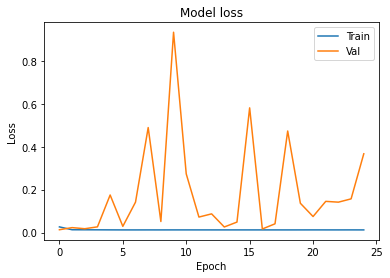

In [41]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

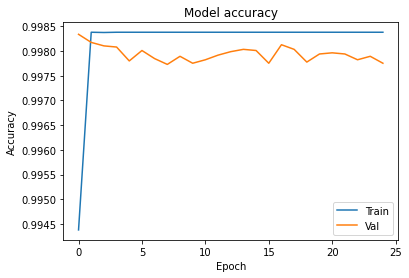

In [42]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [49]:
model2 = Sequential()

model2.add(keras.layers.Dense(128, activation='relu', input_shape=(30,)))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

model2.compile(loss='binary_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

print('model defined :)')

model defined :)


In [50]:
hist2 = model2.fit(X_train, y_train,
        epochs=25,
        validation_data=(X_val, Y_val),
        callbacks = callbacks)

Epoch 1/25
6231/6231 [==============================] - 14s 2ms/step - loss: 0.8610 - accuracy: 0.4926 - val_loss: 0.6743 - val_accuracy: 0.4872

Epoch 00001: val_loss did not improve from 0.01294
Epoch 2/25
6231/6231 [==============================] - 13s 2ms/step - loss: 0.8609 - accuracy: 0.4925 - val_loss: 0.6711 - val_accuracy: 0.4693

Epoch 00002: val_loss did not improve from 0.01294
Epoch 3/25
6209/6231 [============================>.] - ETA: 0s - loss: 0.8620 - accuracy: 0.4922

KeyboardInterrupt: 